Analysis
* Observed trend 1: The max temperature can be found in and around equator and as we move further away from the equator the max temperature drops.
* Observed trend 2: Latitude has no effect on cloudiness.
* Observed trend 3: The windspeed increases with the increase in distance from equator. however,  their correlation are not very strong.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

## Perform API Calls

In [38]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
city_df = []

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
set_num = 1
record_num = 1

#print header to log file
print("Beginning Data Retrieval ")
print("-----------------------------")
for i, city in enumerate(cities):
    
    #creating set of 50 cities
    if (i %50 == 0 and i >= 50):
        record_num += 0
        set_num += 1
        
    query_url = url + "&q=" + city
    
    #create log of the url and record
    print(f"Processing Record {record_num} of Set {set_num} | {city}")
    print(query_url)
    record_num += 1
    
    #Get the temperature, temp, humidity and other properties from the response for each city
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_df.append({"City": city,
                        "Cloudiness": weather_json["clouds"]["all"],
                        "Country": weather_json["sys"]["country"],
                        "Date":weather_json["dt"],
                        "Humidity":weather_json["main"]["humidity"],
                        "Lat":weather_json["coord"]["lat"],
                        "Lng":weather_json["coord"]["lon"],
                        "Max Temp":weather_json["main"]["temp_max"],
                        "Wind Speed":weather_json["wind"]["speed"] })
    except:
        print("city data not found")
    #print(f"The weather API responded with: {weather_json}.")

# Get the temperature from the response
# Print end of loading to log file
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=busselton
Processing Record 2 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta arenas
Processing Record 3 of Set 1 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tasiilaq
Processing Record 4 of Set 1 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=arraial do cabo
Processing Record 5 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=jamestown
Processing Record 6 of Set 1 | inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=inuvik
Processing

Processing Record 54 of Set 2 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bredasdorp
Processing Record 55 of Set 2 | lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lolua
city data not found
Processing Record 56 of Set 2 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lompoc
Processing Record 57 of Set 2 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=thompson
Processing Record 58 of Set 2 | lampang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lampang
Processing Record 59 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bluff
Processing Record 60 of Set 2 | halifax
http://api.openweathermap.org/data/2

Processing Record 109 of Set 3 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=illoqqortoormiut
city data not found
Processing Record 110 of Set 3 | idlib
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=idlib
Processing Record 111 of Set 3 | milkovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=milkovo
Processing Record 112 of Set 3 | skalistyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=skalistyy
city data not found
Processing Record 113 of Set 3 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=new norfolk
Processing Record 114 of Set 3 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cabo san lucas
Processi

Processing Record 161 of Set 4 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=aklavik
Processing Record 162 of Set 4 | tabuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tabuk
Processing Record 163 of Set 4 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kahului
Processing Record 164 of Set 4 | skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=skibbereen
Processing Record 165 of Set 4 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=norman wells
Processing Record 166 of Set 4 | sydney mines
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sydney mines
Processing Record 167 of Set 4 | nkowakowa
http://api.openweatherm

Processing Record 215 of Set 5 | pringsewu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=pringsewu
Processing Record 216 of Set 5 | asyut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=asyut
Processing Record 217 of Set 5 | satitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=satitoa
city data not found
Processing Record 218 of Set 5 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=barentsburg
city data not found
Processing Record 219 of Set 5 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=puerto escondido
Processing Record 220 of Set 5 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ostrovnoy
Processing Record 

Processing Record 269 of Set 6 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cherskiy
Processing Record 270 of Set 6 | cirebon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cirebon
Processing Record 271 of Set 6 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kloulklubed
Processing Record 272 of Set 6 | guajara-mirim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=guajara-mirim
city data not found
Processing Record 273 of Set 6 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=atar
Processing Record 274 of Set 6 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ixtapa
Processing Record 275 of Set 6 | tungkang
http://api.o

city data not found
Processing Record 322 of Set 7 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ponta do sol
Processing Record 323 of Set 7 | olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=olinda
Processing Record 324 of Set 7 | namie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=namie
Processing Record 325 of Set 7 | severodvinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=severodvinsk
Processing Record 326 of Set 7 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=srednekolymsk
Processing Record 327 of Set 7 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=vaitupu
city data not found
Processing Record 328 

Processing Record 376 of Set 8 | varhaug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=varhaug
Processing Record 377 of Set 8 | chizhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=chizhou
Processing Record 378 of Set 8 | praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=praia
Processing Record 379 of Set 8 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=quatre cocos
Processing Record 380 of Set 8 | toora-khem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=toora-khem
Processing Record 381 of Set 8 | rongcheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=rongcheng
Processing Record 382 of Set 8 | salihli
http://api.openweathermap.org/d

Processing Record 429 of Set 9 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kieta
Processing Record 430 of Set 9 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=vestmannaeyjar
Processing Record 431 of Set 9 | senanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=senanga
Processing Record 432 of Set 9 | loa janan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=loa janan
Processing Record 433 of Set 9 | dongsheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=dongsheng
Processing Record 434 of Set 9 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=maniitsoq
Processing Record 435 of Set 9 | hit
http://api.openweathermap.org

Processing Record 482 of Set 10 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=umzimvubu
city data not found
Processing Record 483 of Set 10 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=husavik
Processing Record 484 of Set 10 | chakwal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=chakwal
Processing Record 485 of Set 10 | bhim tal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bhim tal
Processing Record 486 of Set 10 | muisne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=muisne
Processing Record 487 of Set 10 | finnsnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=finnsnes
Processing Record 488 of Set 10 | amot
http://api.openwe

Processing Record 536 of Set 11 | rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=rosario
Processing Record 537 of Set 11 | lamu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lamu
Processing Record 538 of Set 11 | battle creek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=battle creek
Processing Record 539 of Set 11 | gweta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=gweta
Processing Record 540 of Set 11 | menongue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=menongue
Processing Record 541 of Set 11 | kawalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kawalu
Processing Record 542 of Set 11 | anadyr
http://api.openweathermap.org/data/2.5/we

Processing Record 590 of Set 12 | kampene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kampene
Processing Record 591 of Set 12 | arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=arlit
Processing Record 592 of Set 12 | honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=honiara
Processing Record 593 of Set 12 | cabra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cabra
Processing Record 594 of Set 12 | mlonggo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mlonggo
Processing Record 595 of Set 12 | igarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=igarka
Processing Record 596 of Set 12 | chengde
http://api.openweathermap.org/data/2.5/weather?uni

In [37]:
city_data_pd = pd.DataFrame(city_df)
city_data_pd.to_csv(output_data_file, encoding='utf-8',index=False)
city_data_pd.count()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,76,AU,1535667864,100,-33.64,115.35,54.56,10.96
1,punta arenas,40,CL,1535666400,75,-53.16,-70.91,41.00,14.99
2,tasiilaq,92,GL,1535665800,75,65.61,-37.64,42.80,40.26
3,arraial do cabo,0,BR,1535662800,65,-22.97,-42.02,77.00,21.92
4,jamestown,92,AU,1535667263,99,-33.21,138.60,47.09,15.66


In [40]:
#Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,76,AU,1535667864,100,-33.64,115.35,54.56,10.96
1,punta arenas,40,CL,1535666400,75,-53.16,-70.91,41.00,14.99
2,tasiilaq,92,GL,1535665800,75,65.61,-37.64,42.80,40.26
3,arraial do cabo,0,BR,1535662800,65,-22.97,-42.02,77.00,21.92
4,jamestown,92,AU,1535667263,99,-33.21,138.60,47.09,15.66


Latitude vs Temperature Plot

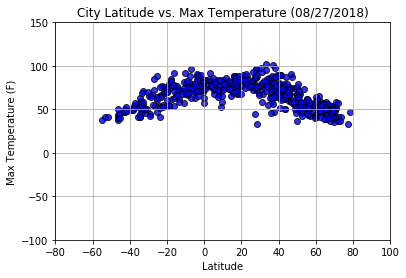

In [41]:
#Building scatter plot for city  Latitude vs Max Temperature
plt.scatter(city_data_pd["Lat"],
            city_data_pd["Max Temp"],
            linewidths=1, marker = "o",edgecolors="black",
            facecolors="blue",
            alpha=0.8, label="Cities")

# Adding label the graph 
plt.title("City Latitude vs. Max Temperature " + "(08/27/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(-100,150)
plt.xlim(-80,100)
plt.grid(True)

#save the figure
plt.savefig("output_data/lat_vs_temp.png")

#show plot
plt.show()

Latitude vs. Humidity Plot

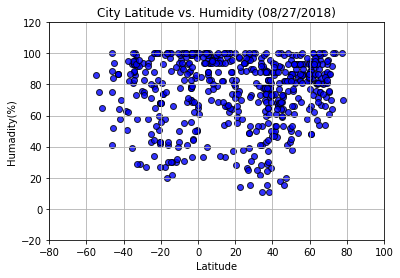

In [42]:
#Building the scatter plot for latitude vs humidity plot
plt.scatter(city_data_pd["Lat"],
            city_data_pd["Humidity"],
            linewidths=1, marker = "o",edgecolors="black",
            facecolors="blue",
            alpha=0.8, label="Cities")

# Adding label the graph 
plt.title("City Latitude vs. Humidity " + "(08/27/2018)" )
plt.ylabel("Humadity(%)")
plt.xlabel("Latitude")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.grid(True)

#save the figure
plt.savefig("output_data/lat_vs_humidity.png")

#show plot
plt.show()

Latitude vs. Cloudiness Plot

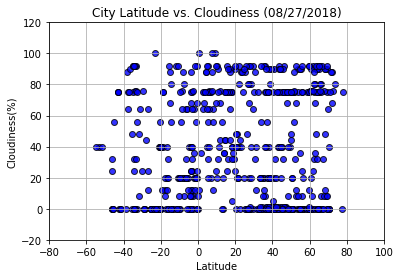

In [43]:
#Building the scatter plot for latitude vs cloudiness plot
plt.scatter(city_data_pd["Lat"],
            city_data_pd["Cloudiness"],
            linewidths=1, marker = "o",edgecolors="black",
            facecolors="blue",
            alpha=0.8, label="Cities")

# Adding label the graph 
plt.title("City Latitude vs. Cloudiness " + "(08/27/2018)" )
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.grid(True)

#save the figure
plt.savefig("output_data/lat_vs_cloudiness.png")

#show plot
plt.show()

Latitude vs.Wind Speed Cost

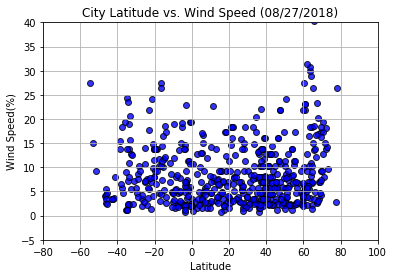

In [45]:
#Building the scatter plot for latitude vs wind speed cost
plt.scatter(city_data_pd["Lat"],
            city_data_pd["Wind Speed"],
            linewidths=1, marker = "o",edgecolors="black",
            facecolors="blue",
            alpha=0.8, label="Cities")

# Adding label the graph 
plt.title("City Latitude vs. Wind Speed " + "(08/27/2018)" )
plt.ylabel("Wind Speed(%)")
plt.xlabel("Latitude")
plt.ylim(-5,40)
plt.xlim(-80,100)
plt.grid(True)

#save the figure
plt.savefig("output_data/lat_vs_wind_speed.png")

#show plot
plt.show()